In [3]:
from chromalab.observer import Observer
from chromalab.spectra import Spectra, Illuminant
import colour
from colour.models import RGB_COLOURSPACE_sRGB
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from tqdm import tqdm
%matplotlib widget

In [87]:
# methods
def getSpectralLocus(wavelengths, responseFunctions):
    """
    Let n be the size of the array, wavelengths, and d be the size of responseFunctions.
    i.e. n is the number of wavelengths we are sampling at. d is the dimension of the color solid.
    Input:
    responseFunctions - np.array([coneresponse_1, conresponse_2, ... coneresponse_d]) has shape d, n
        coneresponse_i has n values between 0 and 1, describing the amount of response at each wavelength in wavelengths
    Output:
    Returns an ndarray of shape (n, d) describing the spectral locus, defined in page 6 of jessicas paper
    and also the corresponsing rgb colors
    """
    responseColors = [lms_to_rgb(lms) for lms in responseFunctions.T] # later on change to true colors
    return responseFunctions.T, responseColors
    
def wavelength_to_rgb(wavelength):
    """
    convert wavelength in nm to standard ciexyz to rgb d65 illuminant (NOT BASED OFF OF ANY CONE CELL STUFF)
    """
    xyz = colour.colorimetry.wavelength_to_XYZ(wavelength)
    return xyz_to_rgb(xyz)

def lms_to_rgb(lms):
    """
    lms is numpy array of size 3 np.array([l, m, s])
    stockman and sharpe 2000 transformation
    """
    # stockman sharpe
    T = np.array([[1.94735469, -1.41445123, 0.36476327],
                 [0.68990272, 0.34832189, 0],
                 [0, 0, 1.93485343]])
    xyz = T @ lms 
    return xyz_to_rgb(xyz)

def xyz_to_rgb(xyz):
    """
    xyz to rgb under the d65 illuminant
    """
    X = xyz[0]
    Y = xyz[1]
    Z = xyz[2]
    # for D65, linear relationship
    R =  3.2404542*X - 1.5371385*Y - 0.4985314*Z
    G = -0.9692660*X + 1.8760108*Y + 0.0415560*Z
    B =  0.0556434*X - 0.2040259*Y + 1.0572252*Z
    return np.clip(np.array([R, G, B]), 0, 1)    

def plot2DLocus(points, wavelengths, colors,
                title="MS Spectral Locus",
                xlabel="M Cone Response", 
                ylabel="S Cone Response"):

    plt.close()
    plt.plot(points[:,1], points[:,2], 'b-', zorder=0)
    scatter = plt.scatter(points[:,1], points[:,2], c=colors, zorder=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot3DLocus(points, wavelengths, colors,
                title="LMS Spectral Locus",
                xlabel="L Cone Response", 
                ylabel="M Cone Response",
               zlabel="S Cone Response"):
    plt.close()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the color locus
    ax.plot(points[:, 0], points[:, 1], points[:, 2], 'b-')
    
    # Add scatter points colored by wavelength
    scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, zorder=1)
    
    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    
    # Show the plot
    plt.show()


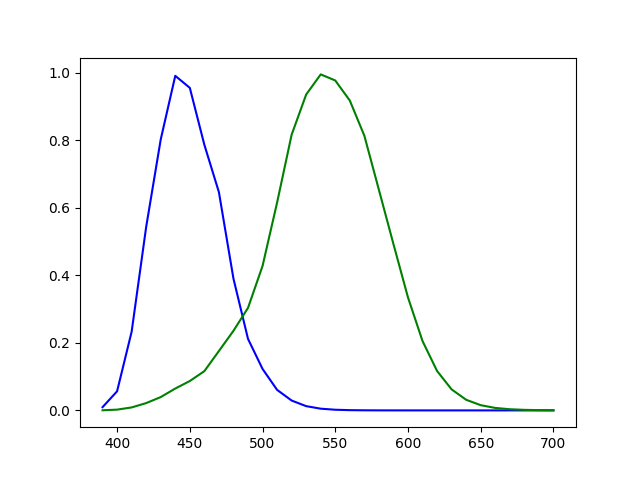

In [88]:
plt.close()
plt.plot(wavelengths, standard_dichromat.sensors[0].data, color="blue")
plt.plot(wavelengths, standard_dichromat.sensors[1].data,  color="green")
plt.show()

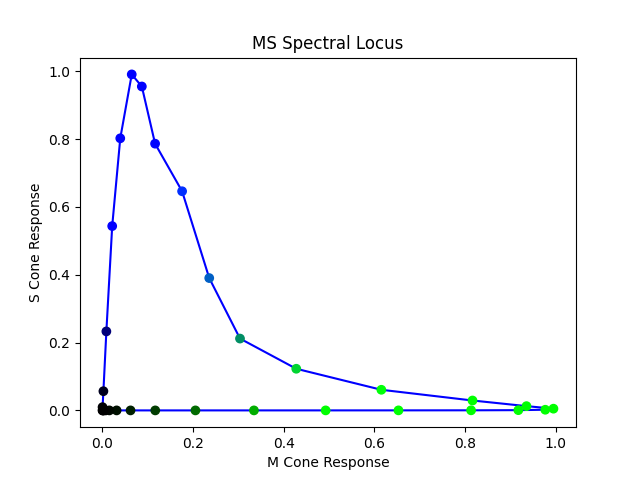

In [89]:
# loading data for 2D case
wavelengths = np.arange(390, 701, 10)
standard_dichromat = Observer.dichromat(wavelengths)
ms_responses = np.vstack((np.zeros(len(wavelengths)),
                           standard_dichromat.sensors[1].data, # m response
                          standard_dichromat.sensors[0].data,  # s response
))

mspoints, mscolors = getSpectralLocus(wavelengths, ms_responses)
plot2DLocus(mspoints, wavelengths, mscolors)

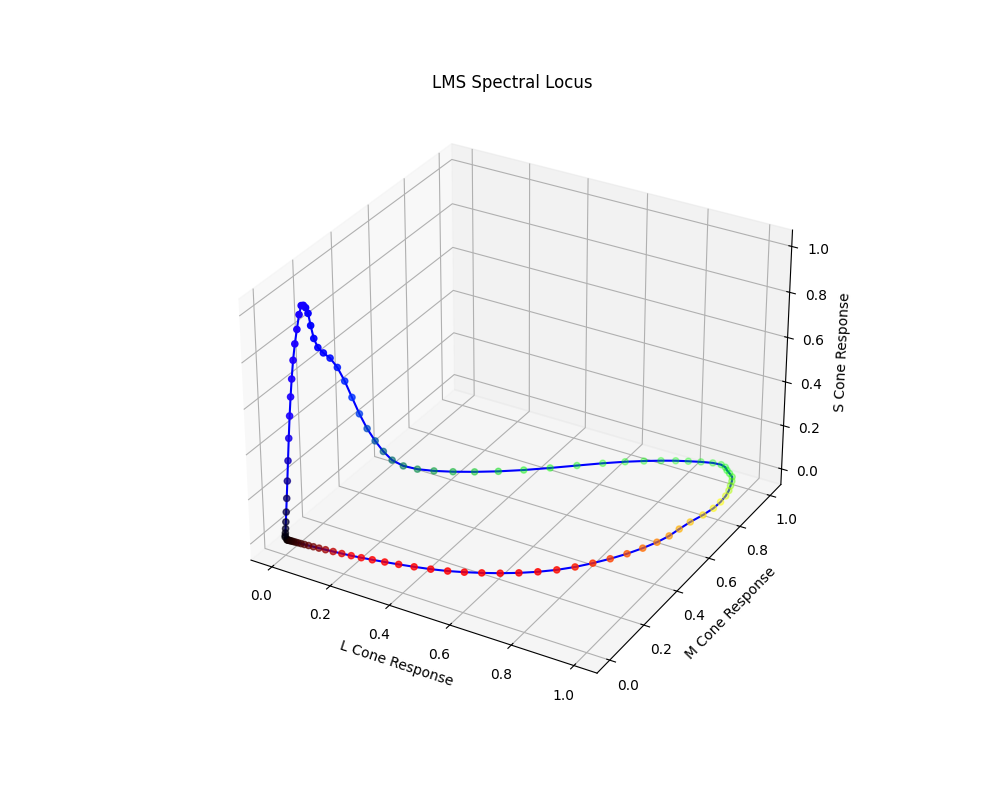

In [90]:
# Get cone response functions
standard_trichromat = Observer.trichromat(np.arange(390, 701, 3))
l_response = standard_trichromat.sensors[2].data
m_response = standard_trichromat.sensors[1].data
s_response = standard_trichromat.sensors[0].data

wavelengths = np.arange(390, 701, 3)

lmspoints, lmscolors  = getSpectralLocus(wavelengths, np.vstack((l_response, m_response, s_response)))
plot3DLocus(lmspoints, wavelengths, lmscolors)